In [1]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re  

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Arpan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Arpan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [3]:
#import dataset
import numpy as np
import pandas as pd

tw_df = pd.read_json('Data/joe_savikataaq.json', lines=True) 
tw_df.head(3)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1416789879153889289,1416789879153889280,2021-07-18 21:30:04 India Standard Time,2021-07-18,21:30:04,530,1009177504375025664,jsavikataaq,Premier Joe Savikataaq,,...,,,,,,[],,,,
1,1416427486888579073,1416427486888579072,2021-07-17 21:30:03 India Standard Time,2021-07-17,21:30:03,530,1009177504375025664,jsavikataaq,Premier Joe Savikataaq,,...,,,,,,[],,,,
2,1416034925061591049,1416034925061591040,2021-07-16 19:30:09 India Standard Time,2021-07-16,19:30:09,530,1009177504375025664,jsavikataaq,Premier Joe Savikataaq,,...,,,,,,[],,,,


In [4]:
#breaking into lines
all_sentences = []

for word in tw_df['tweet']:
    all_sentences.append(word)

all_sentences
#df1 = df.to_string()

#df_split = df1.split()

#df_split
lines = list()
for line in all_sentences:    
    words = line.split()
    for w in words: 
       lines.append(w)


print(lines)

['Thanks', 'for', 'all', 'your', 'hard', 'work,', 'Nunavummiut!', 'Keep', 'at', 'it-', 'Mask', 'up.', 'Physical', 'distance.', 'Small', 'social', 'circles.', 'Wash', 'hands.', 'Get', 'vaccinated.', '😷⬅️➡️🔘🧼💉', 'https://t.co/LaFByKlgwn', 'Have', 'a', 'safe', 'and', 'healthy', 'weekend,', 'and', 'keep', 'it', 'up,', 'Nunavut!', 'https://t.co/hNKfzK4MJY', 'Thank', 'you', 'for', 'all', 'your', 'work,', 'patience', 'and', 'dedication.', 'We’re', 'on', 'the', 'right', 'path.', 'Remember:', '😷⬅️➡️🔘🧼💉', 'https://t.co/RI2GIz5nmN', 'Still', 'at', 'zero.', 'Your', 'Actions.', 'Everybody’s', 'Health.', 'https://t.co/h8AcSMUeVX', 'Let’s', 'keep', 'working!', '👏🏽👏🏽👏🏽', 'https://t.co/wagpIXPvyV', '22,000+', '1st💉', '17,000+', '2nd💉', 'https://t.co/f7Fd4E66vM', '0️⃣=😷⬅️➡️🔘🧼', 'https://t.co/k6FRHicwNZ', 'Let’s', 'remain', 'focused', 'in', 'our', 'fight', 'against', '#COVID19.', 'Please', 'continue', 'to', 'follow', 'all', 'the', 'public', 'health', 'measures', 'and', 'get', 'vaccinated', 'if', 'you', '

In [5]:
#Removing Punctuation

lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines

lines2 = []

for word in lines:
    if word != '':
        lines2.append(word)

In [6]:
#This is stemming the words to their root
from nltk.stem.snowball import SnowballStemmer

# The Snowball Stemmer requires that you pass a language parameter
s_stemmer = SnowballStemmer(language='english')

stem = []
for word in lines2:
    stem.append(s_stemmer.stem(word))
    
stem

['thank',
 'for',
 'all',
 'your',
 'hard',
 'work',
 'nunavummiut',
 'keep',
 'at',
 'it',
 'mask',
 'up',
 'physic',
 'distanc',
 'small',
 'social',
 'circl',
 'wash',
 'hand',
 'get',
 'vaccin',
 'httpstcolafbyklgwn',
 'have',
 'a',
 'safe',
 'and',
 'healthi',
 'weekend',
 'and',
 'keep',
 'it',
 'up',
 'nunavut',
 'httpstcohnkfzk4mji',
 'thank',
 'you',
 'for',
 'all',
 'your',
 'work',
 'patienc',
 'and',
 'dedic',
 'were',
 'on',
 'the',
 'right',
 'path',
 'rememb',
 'httpstcori2giz5nmn',
 'still',
 'at',
 'zero',
 'your',
 'action',
 'everybodi',
 'health',
 'httpstcoh8acsmuevx',
 'let',
 'keep',
 'work',
 'httpstcowagpixpvyv',
 '22000',
 '1st',
 '17000',
 '2nd',
 'httpstcof7fd4e66vm',
 '0',
 'httpstcok6frhicwnz',
 'let',
 'remain',
 'focus',
 'in',
 'our',
 'fight',
 'against',
 'covid19',
 'pleas',
 'continu',
 'to',
 'follow',
 'all',
 'the',
 'public',
 'health',
 'measur',
 'and',
 'get',
 'vaccin',
 'if',
 'you',
 'havent',
 'alreadi',
 'your',
 'action',
 'everyon',
 '

In [7]:
#Removing all Stop Words

stem2 = []

for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)

stem2

['thank',
 'hard',
 'work',
 'nunavummiut',
 'mask',
 'physic',
 'distanc',
 'small',
 'social',
 'circl',
 'wash',
 'hand',
 'vaccin',
 'httpstcolafbyklgwn',
 'safe',
 'healthi',
 'weekend',
 'nunavut',
 'httpstcohnkfzk4mji',
 'thank',
 'work',
 'patienc',
 'dedic',
 'right',
 'path',
 'rememb',
 'httpstcori2giz5nmn',
 'zero',
 'action',
 'everybodi',
 'health',
 'httpstcoh8acsmuevx',
 'let',
 'work',
 'httpstcowagpixpvyv',
 '22000',
 '1st',
 '17000',
 '2nd',
 'httpstcof7fd4e66vm',
 '0',
 'httpstcok6frhicwnz',
 'let',
 'remain',
 'focus',
 'fight',
 'covid19',
 'pleas',
 'continu',
 'follow',
 'public',
 'health',
 'measur',
 'vaccin',
 'havent',
 'alreadi',
 'action',
 'everyon',
 'health',
 'httpstcoaklwvoo5xg',
 'httpstcotbggmlef7',
 'weve',
 'got',
 'nunavut',
 'mask',
 'bubbl',
 'small',
 'physic',
 'distanc',
 'wash',
 'hand',
 'vaccin',
 'httpstcoa8tla19jix',
 'je',
 'sui',
 'content',
 'de',
 'ce',
 'que',
 'nous',
 'avon',
 'accompli',
 'au',
 'cour',
 'de',
 'la',
 'dernir',

In [8]:
tw_df_st = pd.DataFrame(stem2)

tw_df_st = tw_df_st[0].value_counts()

In [9]:
#This will give frequencies of our words

from nltk.probability import FreqDist

freqdoctor = FreqDist()

for words in tw_df_st:
    freqdoctor[words] += 1

freqdoctor

FreqDist({1: 1006, 2: 149, 3: 69, 4: 50, 5: 47, 6: 12, 12: 10, 10: 10, 7: 9, 8: 8, ...})

In [10]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

c:\users\arpan\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


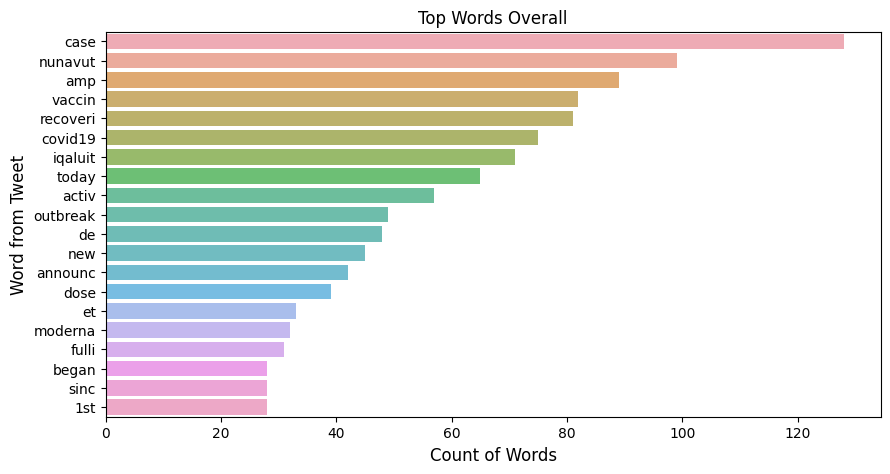

In [11]:
#This is a simple plot that shows the top 20 words being used
#df.plot(20)

tw_df_st = tw_df_st[:20,]
plt.figure(figsize=(10,5))
sns.barplot(tw_df_st.values, tw_df_st.index, alpha=0.8)
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [12]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [13]:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

In [14]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df6 = pd.DataFrame(label, columns = ['Word','Entity'])

df7 = df6.where(df6['Entity'] == 'ORG')

df7 = df7['Word'].value_counts()

c:\users\arpan\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


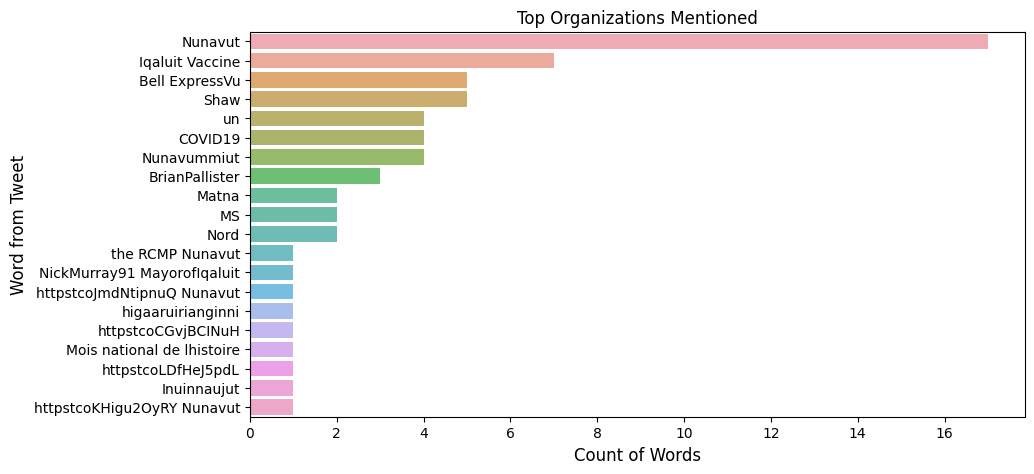

In [15]:
df = df7[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Organizations Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [16]:
df.to_csv("savikataaq.csv")